# Sentiment Analysis (News and Twitter Data)
# Realtime data will be analyzed (After running the code at that instant news and twits will be fetched)


In [1]:
from newspaper import  Article
import newspaper
import pandas as pd
from textblob import TextBlob
from newspaper import Config
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
print("Done")

Done


# Fetching the articles

In [2]:
# Writting changes and making a function

nltk.download('punkt')

newsLinks = ['https://edition.cnn.com/','https://www.foxnews.com/','https://www.bbc.com/news','https://news.sky.com/']
config = Config()

summaryList = []
polarity = []

userAgent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.62'
config.browser_user_agent = userAgent

def getDfForNews(newsNo):
    if newsNo > 4:
        return None
    site = newspaper.build(f"{newsLinks[newsNo]}", memoize_articles=False,config=config)
    top_articles = site.article_urls()
    ar = top_articles[:20]
    for article in ar:
        articles = Article(article,language="en")
        articles.download()
        articles.parse()
        articles.nlp()
        text = articles.summary
        summaryList.append(text)
    for summary in summaryList:
        blob = TextBlob(summary)
        sentiment = blob.sentiment.polarity
        polarity.append(sentiment)

    df1 = pd.DataFrame({'Summary Text':summaryList,'Polarity':polarity})
    summaryList.clear()
    polarity.clear()
    return df1

# fetching data for foxnews

df11 = getDfForNews(1)

df11

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:


index_names = df11[ df11['Summary Text'] == 'Log in to comment on videos and join in on the fun.'].index

print(index_names)

df11.drop(index_names, inplace = True)

df11

# df11.to_csv("FoxNewsWeb.csv",index = 0)

Int64Index([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')


,Summary Text,Polarity
2,CrimeStay informed on everything from news abo...,0.525


In [3]:
# fetching data for CNN

df12 = getDfForNews(0)

df12



,Summary Text,Polarity
0,How relevant is this ad to you?\nVideo player ...,0.018750
1,A man went missing from a Carnival cruise ship...,-0.100000
2,CNN —You may have heard of atmospheric rivers ...,0.157576
3,"This season, they have gone on 28 flight missi...",0.210000
4,Callaghan O'Hare for the Washington Post/Getty...,0.177381
5,CNN —The official start to hurricane season is...,0.058796
6,A body is carried out of the Mudd neighborhood...,0.466667
7,“The government is obviously failing us and no...,-0.088000
8,CNN —The second half of hurricane season is he...,0.016667
9,Hurricanes are categorized by their wind speed...,0.023864


In [4]:
index_names = df12[ df12['Summary Text'] == ''].index

print(index_names)

df12.drop(index_names, inplace = True)

df12.to_csv('CNNWeb.csv')

df12

Int64Index([13], dtype='int64')


,Summary Text,Polarity
0,How relevant is this ad to you?\nVideo player ...,0.018750
1,A man went missing from a Carnival cruise ship...,-0.100000
2,CNN —You may have heard of atmospheric rivers ...,0.157576
3,"This season, they have gone on 28 flight missi...",0.210000
4,Callaghan O'Hare for the Washington Post/Getty...,0.177381
5,CNN —The official start to hurricane season is...,0.058796
6,A body is carried out of the Mudd neighborhood...,0.466667
7,“The government is obviously failing us and no...,-0.088000
8,CNN —The second half of hurricane season is he...,0.016667
9,Hurricanes are categorized by their wind speed...,0.023864


In [43]:
# fetching data for BBC news

df13 = getDfForNews(2)

df13

,Summary Text,Polarity
0,Video caption: 'Victory is not the only thing ...,0.000000
1,Mass protests against strict Covid curbs have ...,0.250000
2,Video caption: Will the 2022 World Cup be 'car...,0.000000
3,"Not only victory, we need justice - Olena Zele...",0.000000
4,Armed men affiliated with Ethiopia's rebel Oro...,0.166667
5,The cost of living in both cities is now the j...,0.166667
6,The prince's godmother resigned after repeated...,0.008333
7,Many households are seeing their energy bills ...,0.211111
8,Video caption: The six-wheeled robots will del...,0.000000
9,A search effort is under way for dozens of peo...,0.166667


In [44]:
index_names = df13[ df13['Summary Text'] == ''].index

print(index_names)

df13.drop(index_names, inplace = True)

df13.to_csv('BBCWEB.csv')

df13

Int64Index([16], dtype='int64')


,Summary Text,Polarity
0,Video caption: 'Victory is not the only thing ...,0.000000
1,Mass protests against strict Covid curbs have ...,0.250000
2,Video caption: Will the 2022 World Cup be 'car...,0.000000
3,"Not only victory, we need justice - Olena Zele...",0.000000
4,Armed men affiliated with Ethiopia's rebel Oro...,0.166667
5,The cost of living in both cities is now the j...,0.166667
6,The prince's godmother resigned after repeated...,0.008333
7,Many households are seeing their energy bills ...,0.211111
8,Video caption: The six-wheeled robots will del...,0.000000
9,A search effort is under way for dozens of peo...,0.166667


In [46]:
# fetching data for Skynews

df14 = getDfForNews(3)

df14 

,Summary Text,Polarity
0,Lady Susan Hussey resigned from her role in th...,0.218750
1,Lady Hussey served as Queen Elizabeth's lady i...,0.103968
2,Prime Minister Rishi Sunak has said whenever w...,0.004762
3,The trailer for Harry and Meghan's new documen...,0.012879
4,Belgium manager steps down after team knocked ...,0.061111
5,"After murdering 34-year-old Ms Morgan, Brown p...",0.200000
6,Ex-military chief says UK is 'at war' with Rus...,0.110119
7,A mega-tsunami on Mars could have been trigger...,-0.020833
8,New figures on lack of trust in police among b...,-0.072940
9,New technology to catch train fare dodgers is ...,0.219394


In [1]:
df14.to_csv("skyNewsWeb.csv")

NameError: name 'df14' is not defined

# For twitter data

In [9]:
df21 = pd.read_csv("CNN.csv")
df22 = pd.read_csv("FoxNews.csv")
df23 = pd.read_csv("BBCWorld.csv")
df24 = pd.read_csv("SkyNews.csv")

df21.drop('Unnamed: 0',axis=1)
df22.drop('Unnamed: 0',axis=1)
df23.drop('Unnamed: 0',axis=1)
df24.drop('Unnamed: 0',axis=1)

,Tweet Text,Likes,Time
0,Hailey Bieber is once again trying to make it ...,44,2022-11-29 18:45:06+00:00
1,As frustrated demonstrators take to the street...,80,2022-11-29 18:30:10+00:00
2,A Finnish brand is bringing high fashion to an...,72,2022-11-29 18:15:09+00:00
3,Iranian soccer great Ali Karimi has alleged th...,220,2022-11-29 18:00:15+00:00
4,Twitter said it will no longer enforce its lon...,417,2022-11-29 17:45:09+00:00
...,...,...,...
95,The families of Iran’s World Cup soccer team h...,4780,2022-11-28 20:00:15+00:00
96,Cyber Monday is now projected to be the bigges...,246,2022-11-28 19:51:51+00:00
97,Merriam-Webster’s word of the year is “gasligh...,786,2022-11-28 19:37:09+00:00
98,"More than 10,000 sippy cups and bottles produc...",143,2022-11-28 19:33:39+00:00


In [ ]:
# getting polarity for various dfs (Just change the number near df)

twitPolarityList = []

for text in df21['Tweet Text']:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    twitPolarityList.append(sentiment)

twitPolarityList[:90]



# Data Visualization (Part 1)

## Web News data analysis

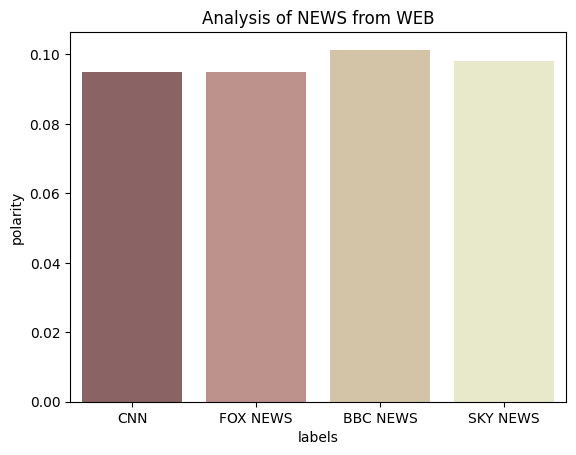

In [22]:
# TODO: Bar graph (mean)

plt.title("Analysis of NEWS from WEB")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(x=pltdf.labels,y=pltdf.polarity,palette='pink')

plt.show()

In [27]:
# function to fetch positive/negative values

def getValues(req,df):
    if req == 1:
        y = df[df['Polarity'] > 0] 
        return y
    elif req == -1:
        y = df[df['Polarity'] < 0] 
        return y
    else:
        return

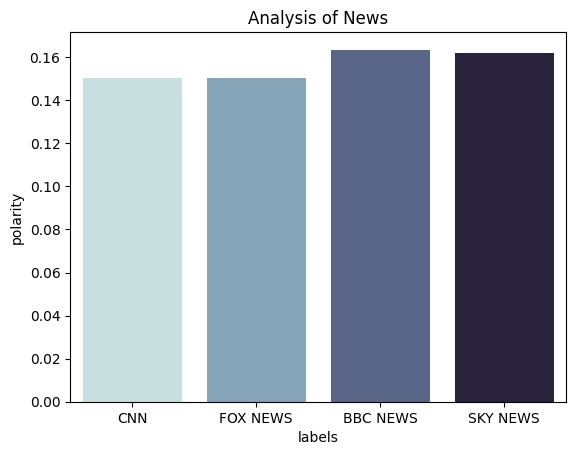

In [53]:
# TODO: Bar graph (Positive values)

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

plt.title("Analysis of News")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(x=pltdf.labels,y=pltdf.polarity,palette="ch:start=.2,rot=-.3")

plt.show()

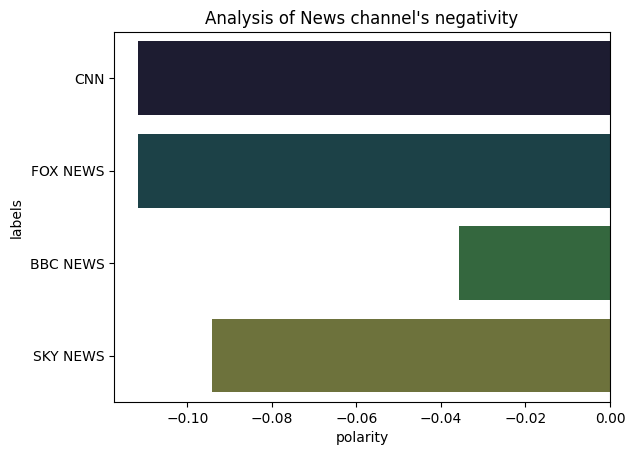

In [56]:
# TODO: Bar graph (Negative values)

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(-1,y0)

y1 = getValues(-1,y1)

y2 = getValues(-1,y2)

y3 = getValues(-1,y3)

plt.title("Analysis of News channel's negativity")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(y=pltdf.labels,x=pltdf.polarity,palette=sns.color_palette("cubehelix", 8))

plt.show()

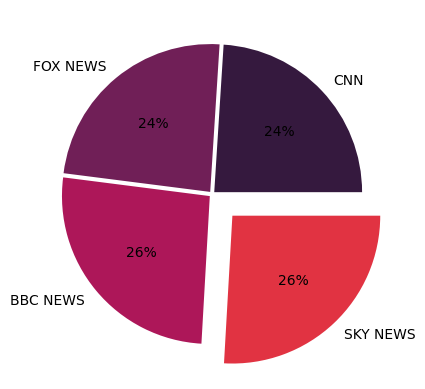

In [51]:
#  TODO: Pie Chart

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

data = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]
labels = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]
explode = [0.02,0.02,0.02,0.2]
colors = sns.color_palette("rocket")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

## Function for word analysis

In [8]:
# %load myFunc.py

# imports 
import re
import nltk
import pandas as pd
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords 
import spacy 
nlp = spacy.load('en_core_web_lg')
import en_core_web_sm

def returnData(df):
    nlp = spacy.load('en_core_web_lg')
    allSentence = []

    for text in df['Summary Text']:
        allSentence.append(text)

    lines = []

    for line in allSentence:
        words = line.split()
        for w in words:
            lines.append(w)

    lines  = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]

    lines2 = []

    for words in lines:
        if words != '':
            lines2.append(words)

    s_stemmer = SnowballStemmer(language='english')

    stem = []

    for words in lines2: 
        if words not in nlp.Defaults.stop_words:
            stem.append(words)

    countingdf = pd.DataFrame(stem)

    countingdf = countingdf[0].value_counts()

    nlp = en_core_web_sm.load()

    str1 = " "
    stem2 = str1.join(lines2)
    stem2 = nlp(stem2)
    label = [(X.text,X.label_) for X in stem2.ents]
    edf1 = pd.DataFrame(label,columns=['Word','Entity'])
    edf2 = edf1.where(edf1['Entity'] == 'PERSON')
    edf3 = edf2['Word'].value_counts()

    return countingdf, edf3

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
dfFoxNewsWeb = pd.read_csv('FoxNewsWeb.csv')

dfCNNWeb = pd.read_csv('CNNWeb.csv')

dfSkyNewsWeb = pd.read_csv('skyNewsWeb.csv')

dfBBCWEB = pd.read_csv('BBCWEB.csv')

print("Done!")

Done!


In [10]:
dfFoxNewsWebWordCount,dfFoxNewsWebPersonCount  = returnData(dfFoxNewsWeb)

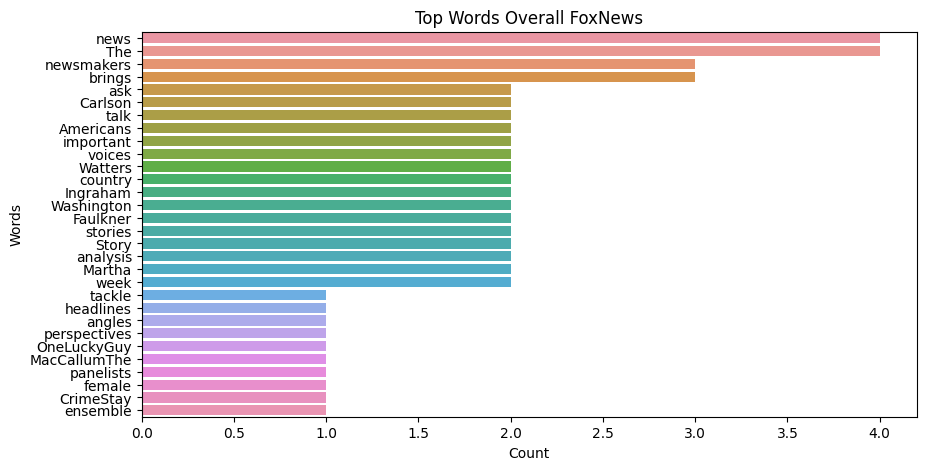

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfFoxNewsWebWordCount = dfFoxNewsWebWordCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfFoxNewsWebWordCount.values,y=dfFoxNewsWebWordCount.index)
plt.title('Top Words Overall FoxNews')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

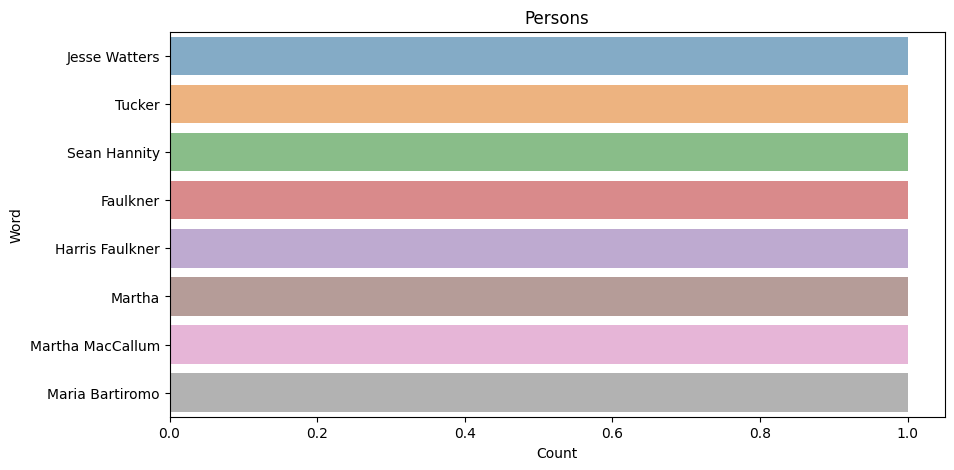

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=dfFoxNewsWebPersonCount.values,y=dfFoxNewsWebPersonCount.index,alpha=0.6)
plt.title("Persons")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [19]:
dfCNNWebCount,dfCNNWebPersonCount  = returnData(dfCNNWeb)

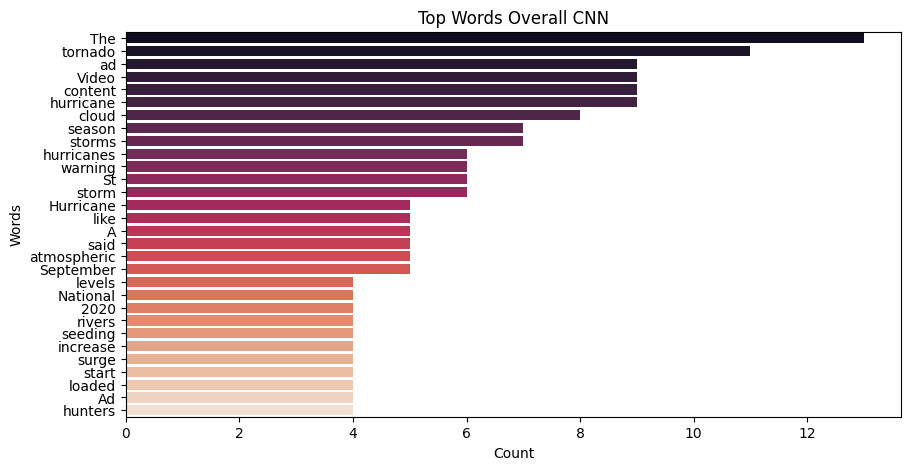

In [35]:
dfCNNWebCount = dfCNNWebCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfCNNWebCount.values,y=dfCNNWebCount.index,palette="rocket")
plt.title('Top Words Overall CNN')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

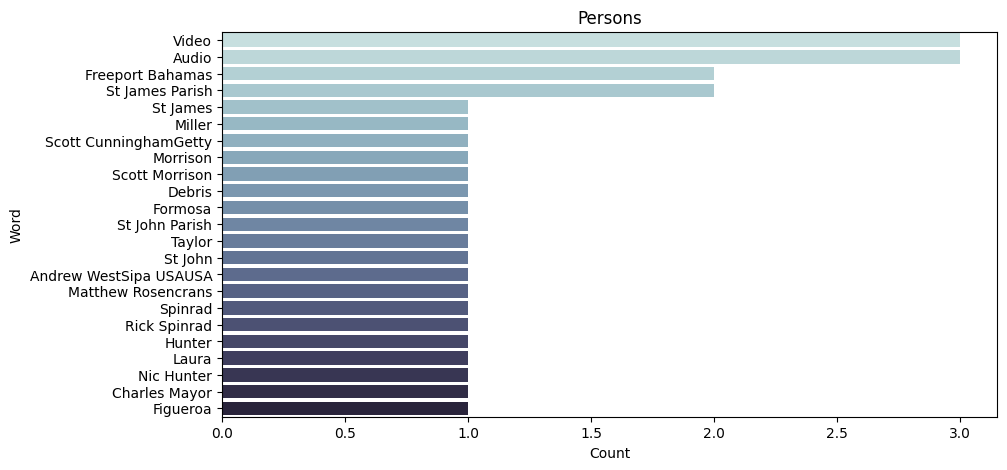

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x=dfCNNWebPersonCount.values,y=dfCNNWebPersonCount.index,palette="ch:start=.2,rot=-.3")
plt.title("Persons")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [22]:
dfSkyNewsWebCount,dfSkyNewsPersonCount  = returnData(dfSkyNewsWeb)

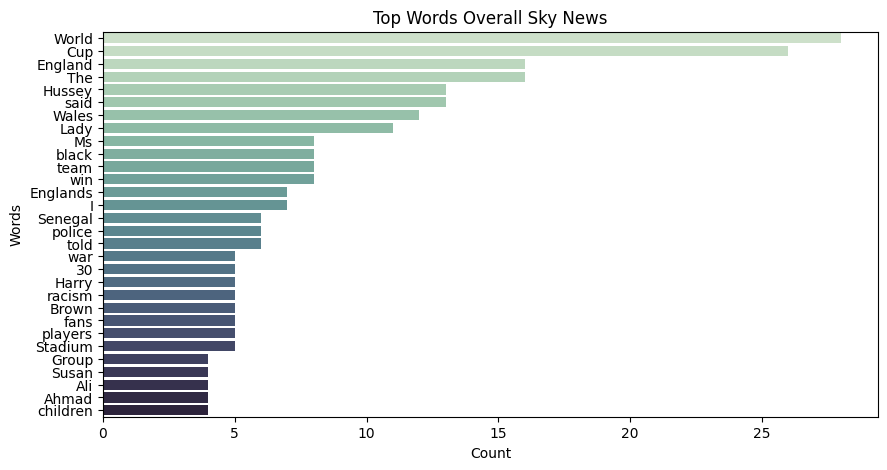

In [42]:
dfSkyNewsWebCount = dfSkyNewsWebCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfSkyNewsWebCount.values,y=dfSkyNewsWebCount.index,palette="ch:start=.4,rot=-.6")
plt.title('Top Words Overall Sky News')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

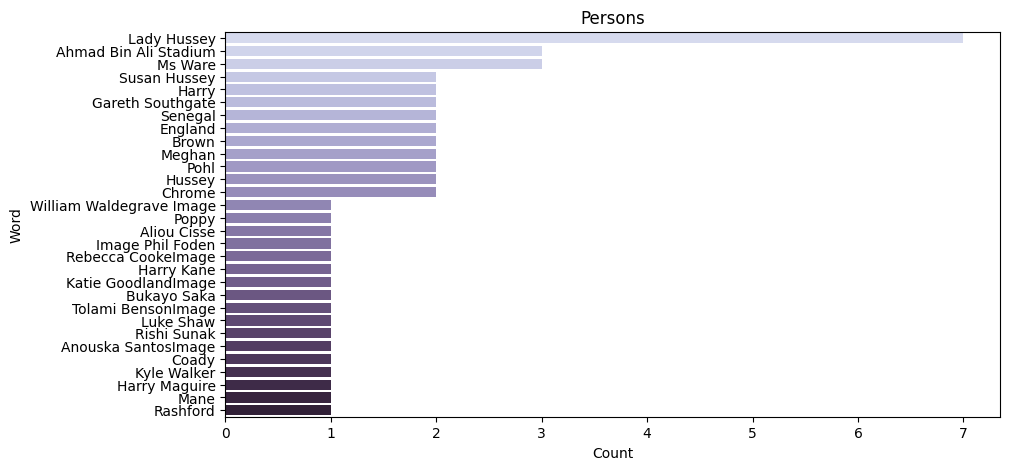

In [43]:
dfSkyNewsPersonCount = dfSkyNewsPersonCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfSkyNewsPersonCount.values,y=dfSkyNewsPersonCount.index,palette="ch:start=.4,rot=-.2")
plt.title("Persons")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [29]:
dfBBCWEBCount,dfBBCWEBPersonCount  = returnData(dfSkyNewsWeb)

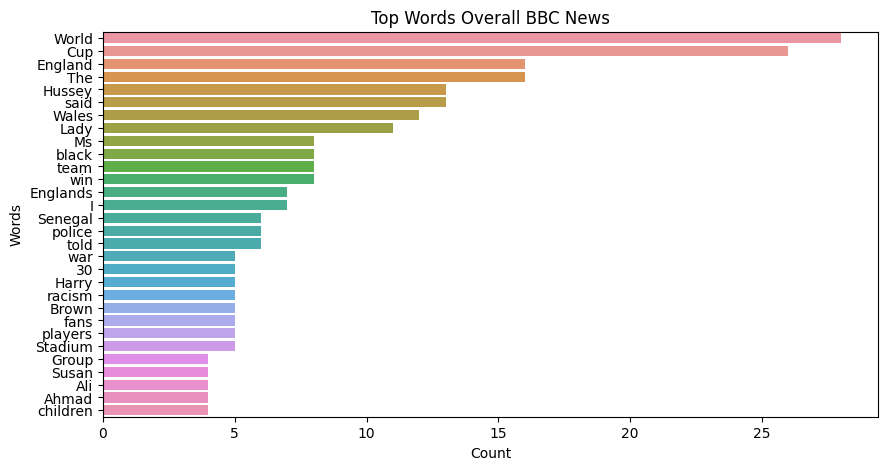

In [31]:
dfBBCWEBCount = dfBBCWEBCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfBBCWEBCount.values,y=dfBBCWEBCount.index)
plt.title('Top Words Overall BBC News')
plt.ylabel('Words')
plt.xlabel("Count")
plt.show()

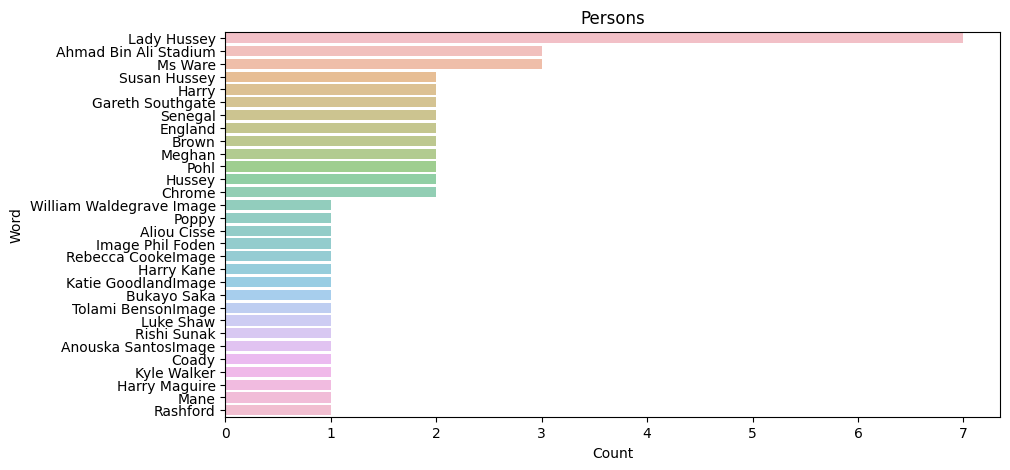

In [33]:
dfBBCWEBPersonCount = dfBBCWEBPersonCount[:30]
plt.figure(figsize=(10,5))
sns.barplot(x=dfBBCWEBPersonCount.values,y=dfBBCWEBPersonCount.index,alpha=0.6)
plt.title("Persons")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

## Twitter data analysis

# Part 2